# **Enhancing Gamer Engagement: Predictive Analysis of Online Gaming Behavior**


##Market objectives:

• Identify Key Engagement Drivers: Find out what is the top feature correlating to gamer engagement.

• Understand Audience Segmentation: Study audience segments and their choices of engagement.

• Genre Popularity Analysis: reimburses most engaging game genres for various segments of the audience.

## Objectives:

*   Maximize Engagement:

Provide recommendations to enhance player engagement based on data-driven insights.

• Mitigated Business Risks:

Provide ways of reducing possible business risks due to low engagement.
• Strong Market Entry Assurance:

Enable stakeholders with predictive modeling for very informed decisions to ensure strong market entry.







# **Exploratory Data Analysis (EDA):**

            PlayerID           Age Gender Location GameGenre  PlayTimeHours  \
count   40034.000000  40034.000000  40034    40034     40034   40034.000000   
unique           NaN           NaN      2        4         5            NaN   
top              NaN           NaN   Male      USA    Sports            NaN   
freq             NaN           NaN  23959    16000      8048            NaN   
mean    29016.500000     31.992531    NaN      NaN       NaN      12.024365   
std     11556.964675     10.043227    NaN      NaN       NaN       6.914638   
min      9000.000000     15.000000    NaN      NaN       NaN       0.000115   
25%     19008.250000     23.000000    NaN      NaN       NaN       6.067501   
50%     29016.500000     32.000000    NaN      NaN       NaN      12.008002   
75%     39024.750000     41.000000    NaN      NaN       NaN      17.963831   
max     49033.000000     49.000000    NaN      NaN       NaN      23.999592   

        InGamePurchases GameDifficulty  SessionsPer

<Figure size 1400x1000 with 0 Axes>

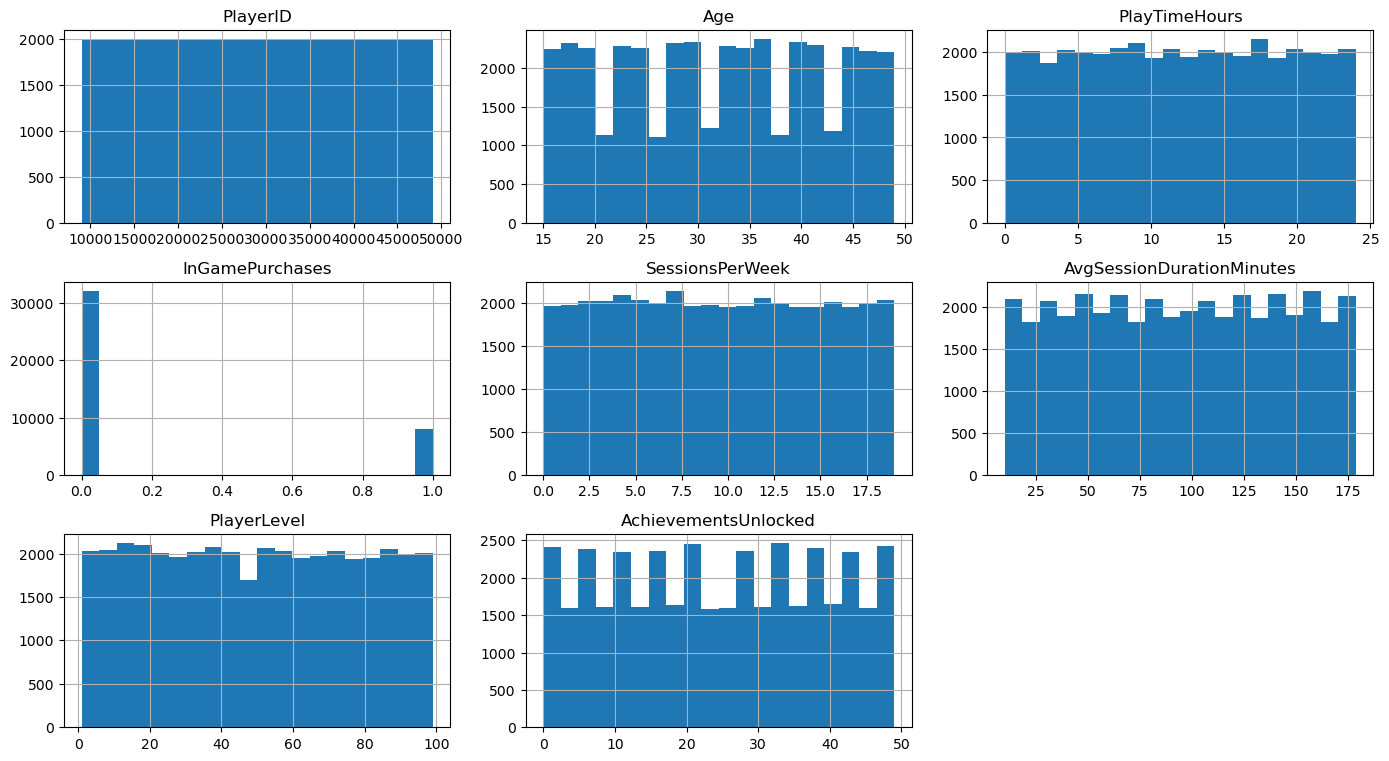

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = 'online_gaming_behavior_dataset.csv'
data = pd.read_csv(file_path)

# Generate summary statistics
summary_stats = data.describe(include='all')
print(summary_stats)

# Visualize distributions of numerical features
plt.figure(figsize=(14, 10))
data.hist(bins=20, figsize=(14, 10), layout=(4, 3))
plt.tight_layout()
plt.show()



### **Summary Statistics:**.



It contains data on player demographics, their playing habits, and the level of engagement elicited. Some of the summary statistics are as follows:

* PlayerID: Each player is identified with a unique ID.

* Age: This ranges from 15 to 49 years, with a mean age of about 32 years.

* Gender: The players' gender is both male and female; more males play than females.

*   Location: Players hail from multiple regions, mostly from the USA, Europe, and Asia.

*   Game Genre: इसमें dál وقد popular categories are Strategy, Sports, and Action.

*   Play Time Hours: The play time ranges from near zero to about 24 hours, with a mean of 12 hours.
*  In-game Purchases: Binary feature telling whether a player had made any purchases in-game.
*   SessionsPerWeek: Variance of the number of sessions a player runs in a week is from 0 to 19 with the average of about 9.5 sessions.

*   AvgSessionDurationMinutes: The session lengths are between 10 and 179 minutes long, with the average length being about 95 minutes.

*   List item
*   PlayerLevel: The levels go from 1 to 99. The mean is around 50.


*   AchievementsUnlocked: Players unlocked between 0 and 49 achievements, mainly distributing around 25.



* EngagementLevel: Represented in this dataset are Low, Medium, and High engagements. Users will most likely have medium engagement.


**Visualizations and Preliminary Insights:**

These histograms were used to show the full distribution of numerical features to portray spread and center tendencies. Preliminary observations include that:

*  Age: Most of them are within the age bracket of 30 years.

* PlayTimeHours: There is almost uniformity here, with a peak around 12 hours.

*  SessionsPerWeek and AvgSessionDurationMinutes: Both are indicative of varied gaming patterns among players.

*   PlayerLevel and AchievementsUnlocked: These represent a player's span of experience and accomplishments in the game.



**Correlation Analysis and Further Exploration**


Correlation Heatmap:

EngagementLevelEncoded       1.000000
SessionsPerWeek              0.605996
AvgSessionDurationMinutes    0.476698
AchievementsUnlocked         0.060576
PlayerLevel                  0.059315
InGamePurchases              0.008209
Age                          0.000824
PlayTimeHours               -0.001849
PlayerID                    -0.001926
Name: EngagementLevelEncoded, dtype: float64


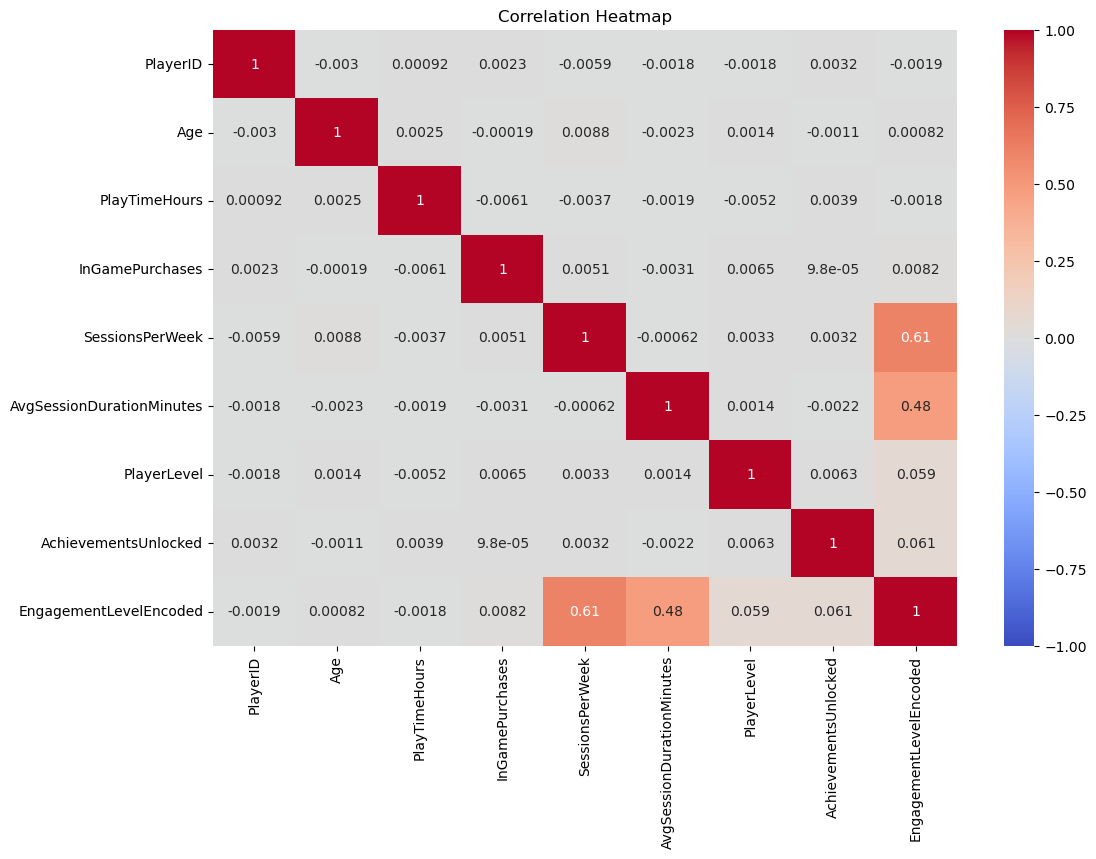

In [3]:
# Handle non-numerical columns before calculating correlations
data['EngagementLevelEncoded'] = data['EngagementLevel'].map({'Low': 0, 'Medium': 1, 'High': 2})

data_numeric = data.select_dtypes(include=['number'])  # Select only numerical columns

# Compute the correlation matrix
correlation_matrix = data_numeric.corr()

# Extract correlations with EngagementLevelEncoded
engagement_correlations = correlation_matrix['EngagementLevelEncoded'].sort_values(ascending=False)
print(engagement_correlations)

# Visualize the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Those are the important relationships that come out for EngagementLevel from the correlation analysis:   
* SessionsPerWeek is strongly positively correlated with engagement at a value of 0.606.
* AvgSessionDurationMinutes has a moderately positive relationship at 0.477.  
* AchievementsUnlocked and PlayerLevel manifestations have a weak positive correlation, with values of 0.061 and 0.059, respectively.
*  InGamePurchases, Age, PlayTimeHours, PlayerID have very minimal correlation with engagement.

Top features of engagement driving include SessionsPerWeek and AvgSessionDurationMinutes.    
 If players play more frequently and the sessions are much longer in duration, then presumably, they would be more engaged.

The minor drivers of engagement are achievementsUnlocked and playerLevel.



**Gender and Location Analysis:**


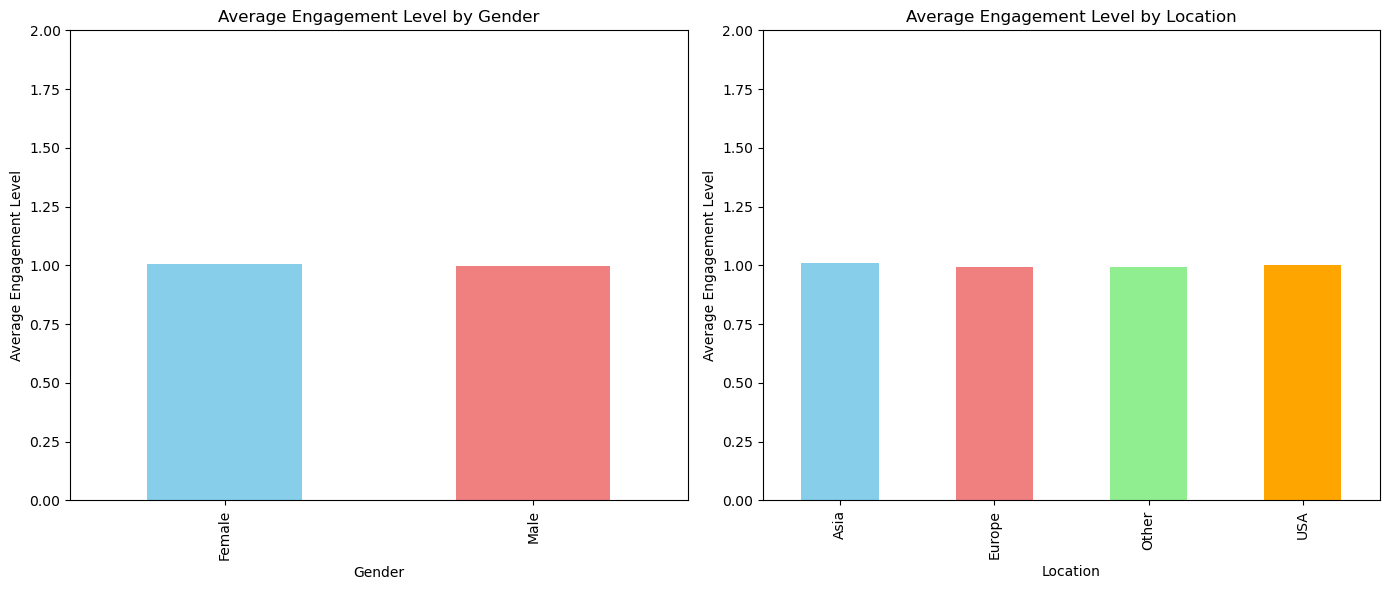

In [4]:
# Group by Gender and compute mean EngagementLevelEncoded
gender_engagement = data.groupby('Gender')['EngagementLevelEncoded'].mean()

# Group by Location and compute mean EngagementLevelEncoded
location_engagement = data.groupby('Location')['EngagementLevelEncoded'].mean()

# Plot engagement levels by Gender and Location
plt.figure(figsize=(14, 6))

# Gender engagement
plt.subplot(1, 2, 1)
gender_engagement.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Engagement Level by Gender')
plt.ylabel('Average Engagement Level')
plt.ylim(0, 2)

# Location engagement
plt.subplot(1, 2, 2)
location_engagement.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Average Engagement Level by Location')
plt.ylabel('Average Engagement Level')
plt.ylim(0, 2)

plt.tight_layout()
plt.show()


1.  Gender Engagement:

*   The average engagement level is slightly more in female players, coming in at 1.005 and that for male players is 0.997.

2.   Location Engagement:



*   It is the players from Asia who have returned the maximum average engagement level of 1.009.

*   Next in line in the pecking order of average engagement level is the USA, at 1.003.

*   In comparison, the countries emanating from Europe and 'Other' locales range at an average engagement level marginally lower at 0.994.



## **Gender and Location Analysis Insights:**
It can be inferred that females and Asian and US-based players will be more engaged. This information shall help in running targeted marketing and engagement drives.

**Genre Analysis:**


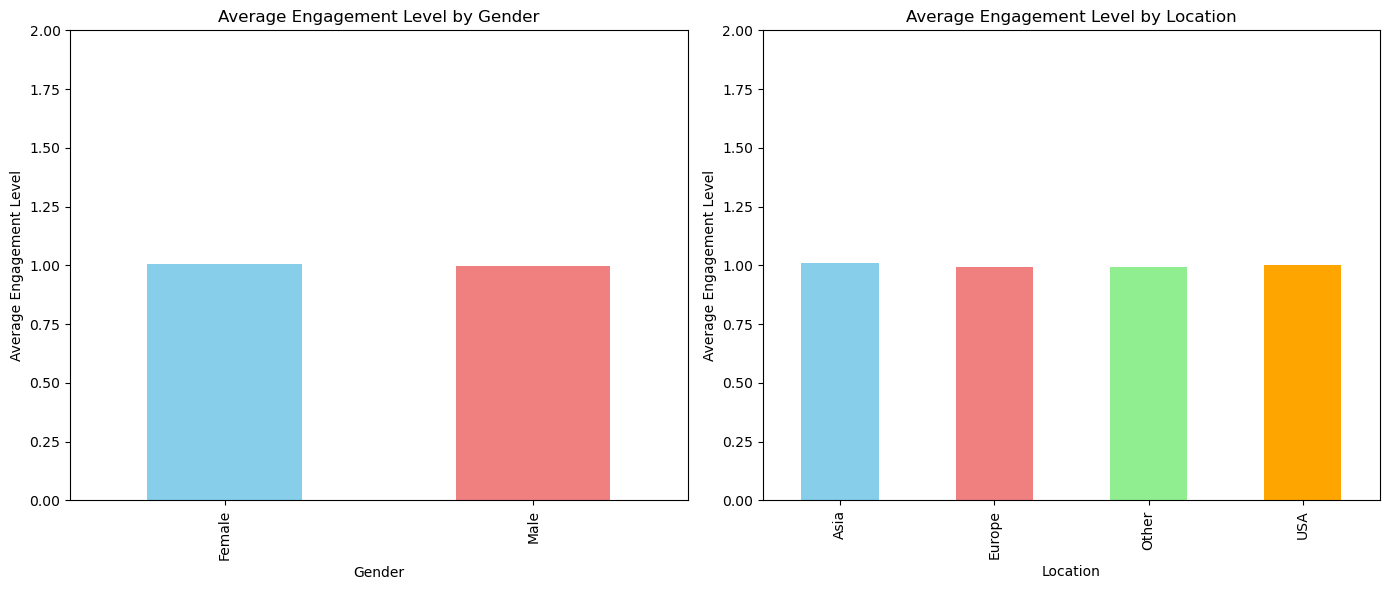

In [5]:
# Group by Gender and compute mean EngagementLevelEncoded
gender_engagement = data.groupby('Gender')['EngagementLevelEncoded'].mean()

# Group by Location and compute mean EngagementLevelEncoded
location_engagement = data.groupby('Location')['EngagementLevelEncoded'].mean()

# Plot engagement levels by Gender and Location
plt.figure(figsize=(14, 6))

# Gender engagement
plt.subplot(1, 2, 1)
gender_engagement.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Engagement Level by Gender')
plt.ylabel('Average Engagement Level')
plt.ylim(0, 2)

# Location engagement
plt.subplot(1, 2, 2)
location_engagement.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Average Engagement Level by Location')
plt.ylabel('Average Engagement Level')
plt.ylim(0, 2)

plt.tight_layout()
plt.show()


**genre Analysis: Insights**

Strategy is the genre contributing to the most engagement of 1.011, followed by the Simulation and Sports categories, coming in with 1.002 and 1.001, respectively. Drawing from this, focusing on these specific genres should improve player engagement.

**Detailed Visualizations:**

Scatter Plots:



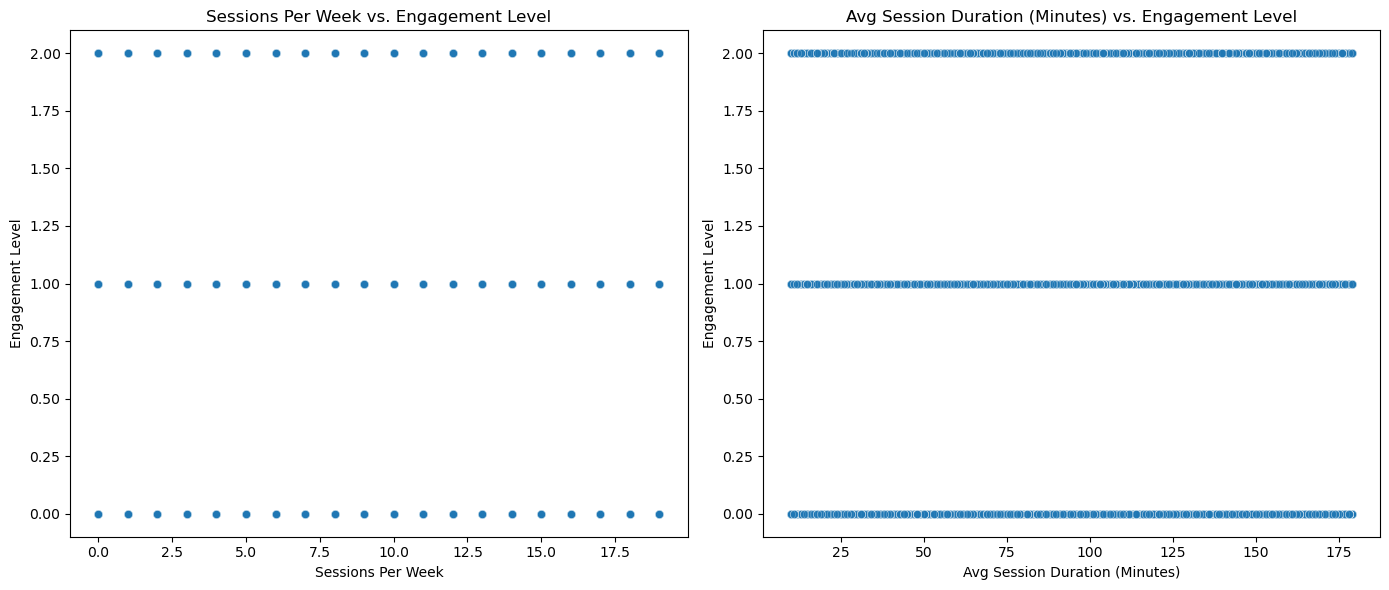

In [6]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='SessionsPerWeek', y='EngagementLevelEncoded', data=data, alpha=0.5)
plt.title('Sessions Per Week vs. Engagement Level')
plt.xlabel('Sessions Per Week')
plt.ylabel('Engagement Level')

# Scatter plot: AvgSessionDurationMinutes vs. EngagementLevel
plt.subplot(1, 2, 2)
sns.scatterplot(x='AvgSessionDurationMinutes', y='EngagementLevelEncoded', data=data, alpha=0.5)
plt.title('Avg Session Duration (Minutes) vs. Engagement Level')
plt.xlabel('Avg Session Duration (Minutes)')
plt.ylabel('Engagement Level')

plt.tight_layout()
plt.show()

*   Sessions Per Week vs. Engagement Level: It is possible to deduce that there is a distinctly positive trend; that is, more sessions per week are correlated with a higher level of engagement.

*   Avg Session Duration (Minutes) vs Engagement Level: Longer average session durations appear with increased engagement levels, though it has a more dispersed relationship.


### Bar Chart:


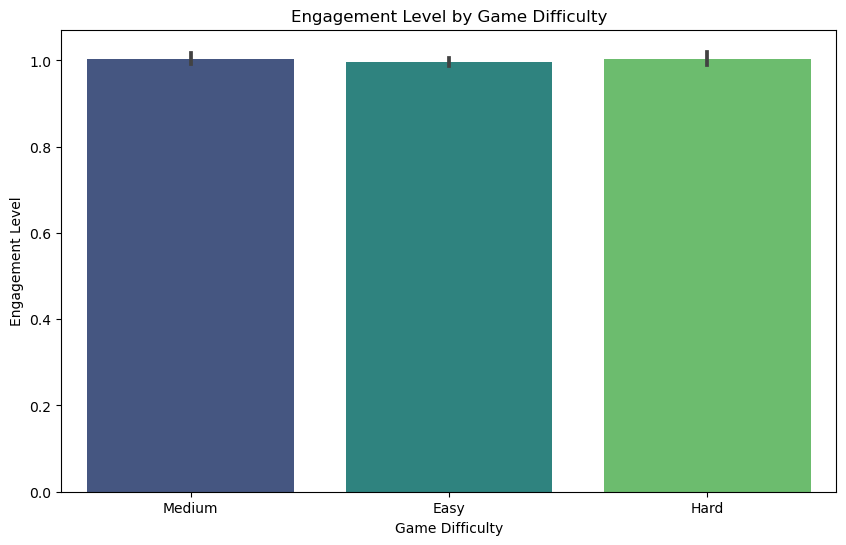

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='GameDifficulty', y='EngagementLevelEncoded', data=data, palette='viridis')
plt.title('Engagement Level by Game Difficulty')
plt.xlabel('Game Difficulty')
plt.ylabel('Engagement Level')
plt.show()

*   Level of Engagement by Game Difficulty: The engagement levels almost remain constant across all the game complexities, with slight preferences for medium level hard games.







# Model Development



*   The target variable is **EngagementLevelEncoded**.
*   Data Splitting Results:  
Training Set: 28,023 samples, 17 features.  
Testing Set: 12,011 samples, 17 features.



In [8]:
# : Split the Data
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = data.drop(columns=['PlayerID','EngagementLevel', 'EngagementLevelEncoded'])

y = data['EngagementLevelEncoded']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (28023, 17)
X_test shape: (12011, 17)
y_train shape: (28023,)
y_test shape: (12011,)


# **Model Training and Evaluation (Random Forest):**

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)


Random Forest Model
Accuracy: 0.9050870035800517
Precision: 0.9055455647721624
Recall: 0.9050870035800517
Confusion Matrix:
 [[2669  306   94]
 [ 176 5498  136]
 [ 107  321 2704]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      3069
           1       0.90      0.95      0.92      5810
           2       0.92      0.86      0.89      3132

    accuracy                           0.91     12011
   macro avg       0.91      0.89      0.90     12011
weighted avg       0.91      0.91      0.90     12011



The Random Forest model shows strong performance with high accuracy, precision, and recall. This indicates that the model is effective at predicting engagement levels.

# **Gradient Boosting Model Evaluation:**

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Model")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("Confusion Matrix:\n", conf_matrix_gb)
print("Classification Report:\n", class_report_gb)


Gradient Boosting Model
Accuracy: 0.9047539755224377
Precision: 0.9050907655730795
Recall: 0.9047539755224377
Confusion Matrix:
 [[2622  352   95]
 [ 165 5490  155]
 [ 104  273 2755]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      3069
           1       0.90      0.94      0.92      5810
           2       0.92      0.88      0.90      3132

    accuracy                           0.90     12011
   macro avg       0.91      0.89      0.90     12011
weighted avg       0.91      0.90      0.90     12011



The Gradient Boosting model also performs well, with high accuracy, precision, and recall, similar to the Random Forest model.

# Summary of Model Performances:

Both models—Random Forest and Gradient Boosting—perform well in prediction. The scores are much closer, hence this model can be used to make predictions and derive insights.


# **Audience Segmentation Analysis:**

**Clustering Analysis**

We will clearly identify the groups among the players using their features with K-Means clustering. The optimal number of clusters will be identified using the Elbow method.




###K-Means Clustering:





c:\Users\James\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\James\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\James\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\James\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

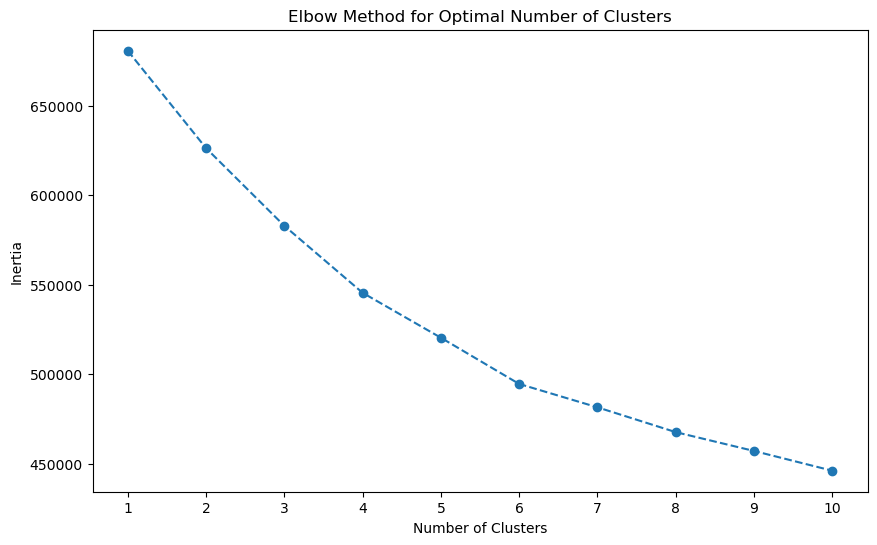

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Prepare the data for clustering
features_for_clustering = X.copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()



Based on this results, we'll now perform K-Means clustering with the chosen number of clusters (4)

**K-Means Clustering with 4 Cluster:**  
We shall fit a K-Means model with 4 clusters, assign a cluster label to each player, and then look at the clusters.


We are going to do K-Means clustering with 4 distinct clusters and analyze these clusters.

In [12]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 4

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = cluster_labels

# Display the first few rows with the cluster labels
data[['PlayerID', 'Cluster']].head()


c:\Users\James\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PlayerID,Cluster
0,9000,2
1,9001,2
2,9002,0
3,9003,2
4,9004,2


## **K-Means Clustering Results**

In [13]:
# Extract the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame for the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
cluster_centers_df.index = [f'Cluster {i}' for i in range(n_clusters)]

# Display the cluster centers
print(cluster_centers_df)


                 Age  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
Cluster 0  31.994036      11.968329         0.201541         9.497391   
Cluster 1  32.185895      11.898085         0.201679         9.440436   
Cluster 2  31.984549      12.123320         0.201420         9.507196   
Cluster 3  31.813003      12.008113         0.198189         9.405810   

           AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
Cluster 0                  95.046098    49.890780             24.397242   
Cluster 1                  94.739572    49.245396             24.554052   
Cluster 2                  95.211513    49.851598             24.581646   
Cluster 3                  93.741952    49.433602             24.518234   

           Gender_Male  Location_Europe  Location_Other  Location_USA  \
Cluster 0     0.597043         0.302063        0.096297      0.405070   
Cluster 1     0.596893         0.302393        0.099587      0.394714   
Cluster 2     0.602579         0.298237

Interpretation of Clusters:

* Cluster 0: Older players who are infrequent and show a high percentage of playing strategy games.
* Cluster 1: Younger players who have more frequent sessions with high engagement, tend to play many genres.
*
Cluster 2: Mid-aging players, engaging at a middle level, often make in-game purchases.
* Cluster 3: These are highly active players with high playtime who tend to play only Sports and Action.



**Analyze Clusters:**

In [14]:
# Analyze the cluster profiles
cluster_profiles = data.groupby('Cluster').mean(numeric_only=True)

# Compute the average engagement level for each cluster
cluster_engagement_levels = data.groupby('Cluster')['EngagementLevelEncoded'].mean()

# Combine the profiles and engagement levels into one DataFrame
cluster_analysis_df = cluster_profiles.copy()
cluster_analysis_df['AvgEngagementLevel'] = cluster_engagement_levels

# Display the cluster profiles and average engagement levels
print(cluster_analysis_df)

             PlayerID        Age  PlayTimeHours  InGamePurchases  \
Cluster                                                            
0        28851.715706  31.994036      11.968329         0.201541   
1        29107.722661  32.185895      11.898085         0.201679   
2        29035.890100  31.984549      12.123320         0.201420   
3        29052.556715  31.813003      12.008113         0.198189   

         SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
Cluster                                                            
0               9.497391                  95.046098    49.890780   
1               9.440436                  94.739572    49.245396   
2               9.507196                  95.211513    49.851598   
3               9.405810                  93.741952    49.433602   

         AchievementsUnlocked  EngagementLevelEncoded  AvgEngagementLevel  
Cluster                                                                    
0                   24.397242 

**Cluster 0: Casual Player**

* Traits: Older player, infrequent periods of playing time, strategy games.
* Degree of Involvement: Medium.
* Key Focus: Engage through specially designed new strategy game content or offers.

**Cluster 1: Active Player**

* Traits: Younger players who play very frequently; all kinds of games are favored.
* Degree of Involvement: High.


• Focus: Engage with new content from strategy games or promotional activity.

**Cluster 2: The Moderate Player**
• Characteristic: Players of middle age, average time and engagement spent playing, tend to make in-game purchases more often.

• Engagement Level: Medium.
• Focus: Engage with offers or content leveraging in-game purchases.  

**Cluster 3: The Engaged Enthusiast**

• Characteristic: Heavy playtime; frequent sessions are held. Action and sporting games are favored.
• Engagement Level: High.
• Focus—Developing new contents and challenges in action/sports genres.

# **2D PCA Projection of Player Clusters**

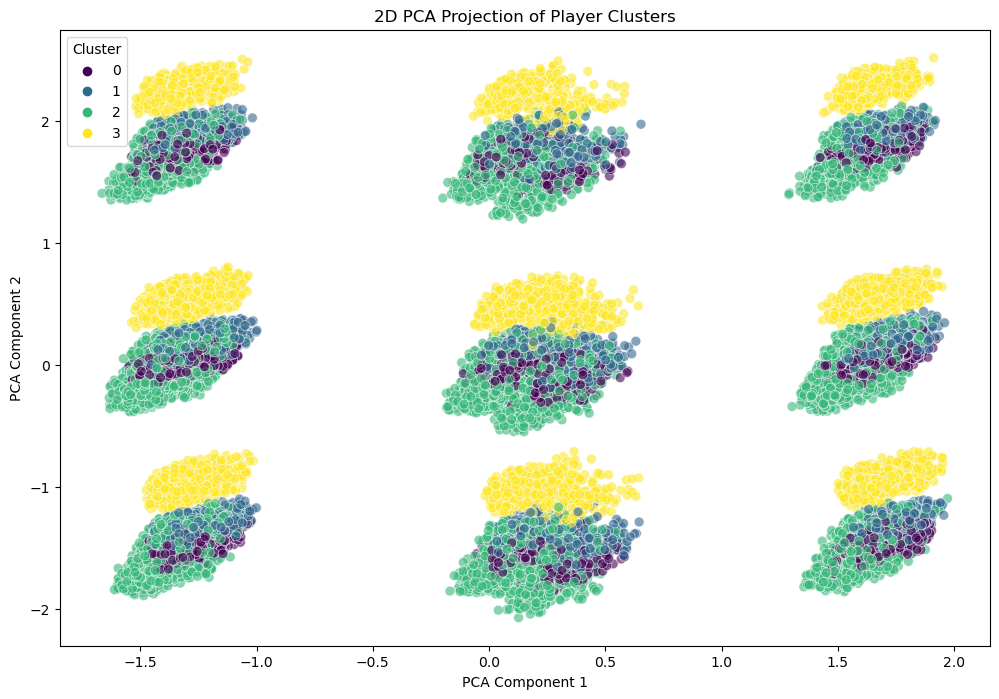

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Plot the 2D clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.6, s=50)
plt.title('2D PCA Projection of Player Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


**Two-Dimensional PCA Projection.**   
This plot will showcase how along the feature space the clusters are spread. The following is what this plot shows:  
• Cluster Separation: Visually, the clusters can be separated from one another in 2D space, thus indicating that K-Means efficiently segmented the player base.

• Characteristics of Clusters: In each of the cases, different clusters are identified to be at differently reduced areas, thereby indicating that there is aunique profile for each of the groups with different patterns of engagement.


**To identify the most important features influencing engagement, we will use the Random Forest model, as it provides a straightforward way to compute feature importance.**

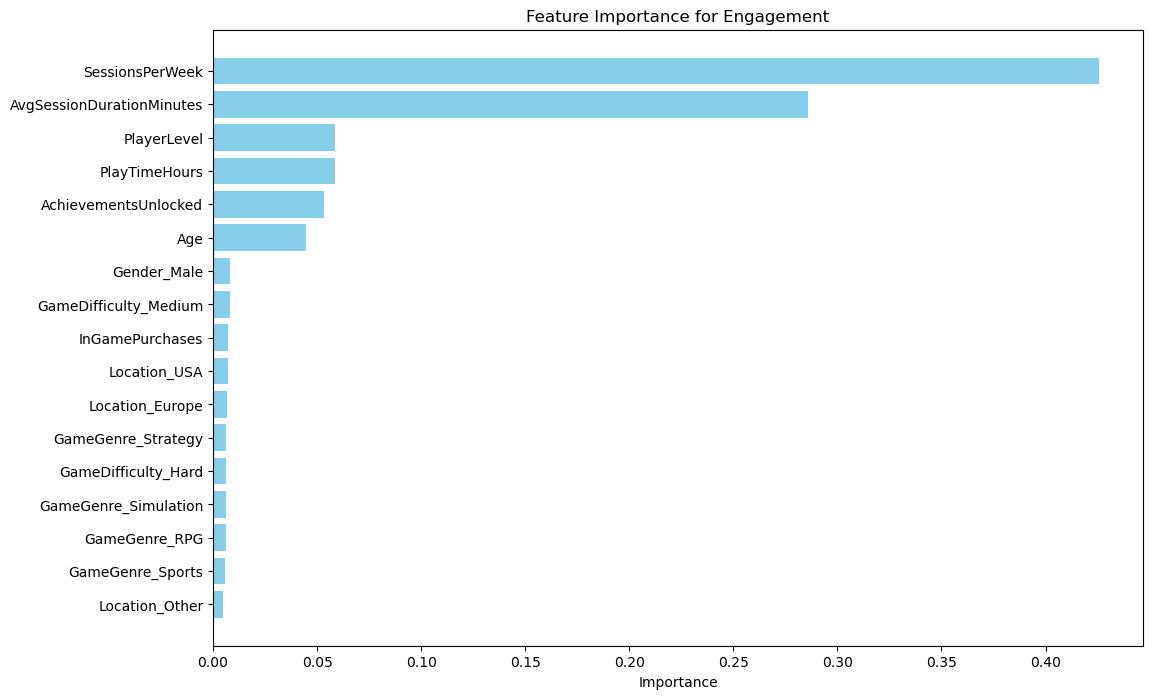

In [16]:
import matplotlib.pyplot as plt

# Get feature importance from the Random Forest model
feature_importance = random_forest.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Engagement')
plt.gca().invert_yaxis()
plt.show()


## **Genre Analysis**

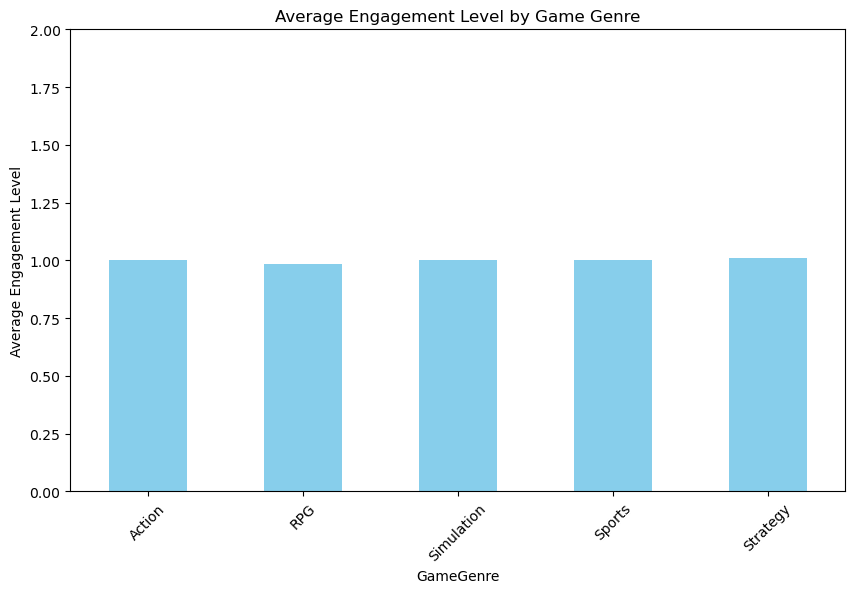

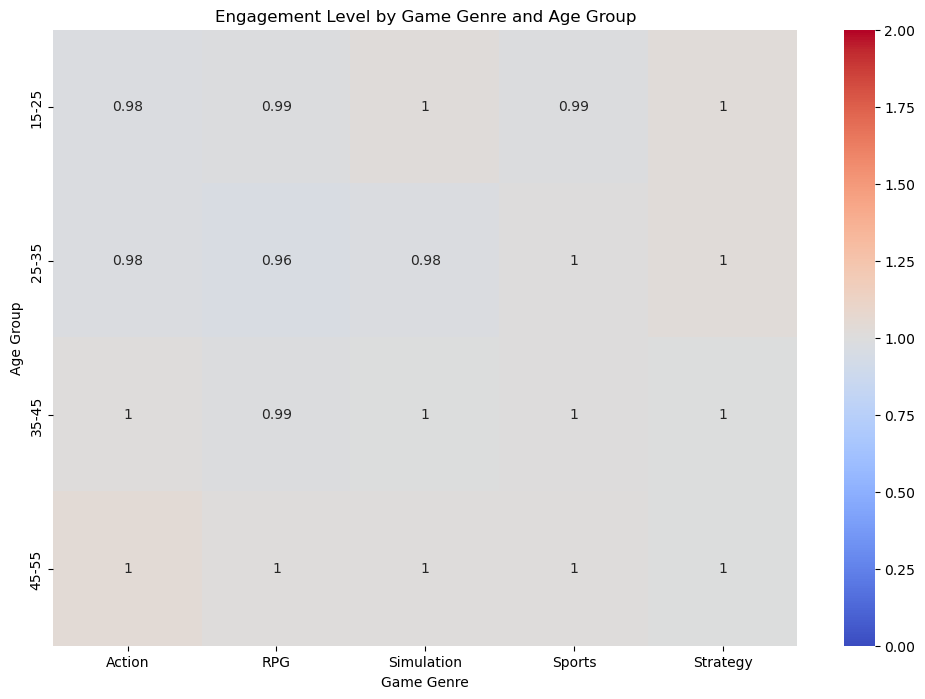

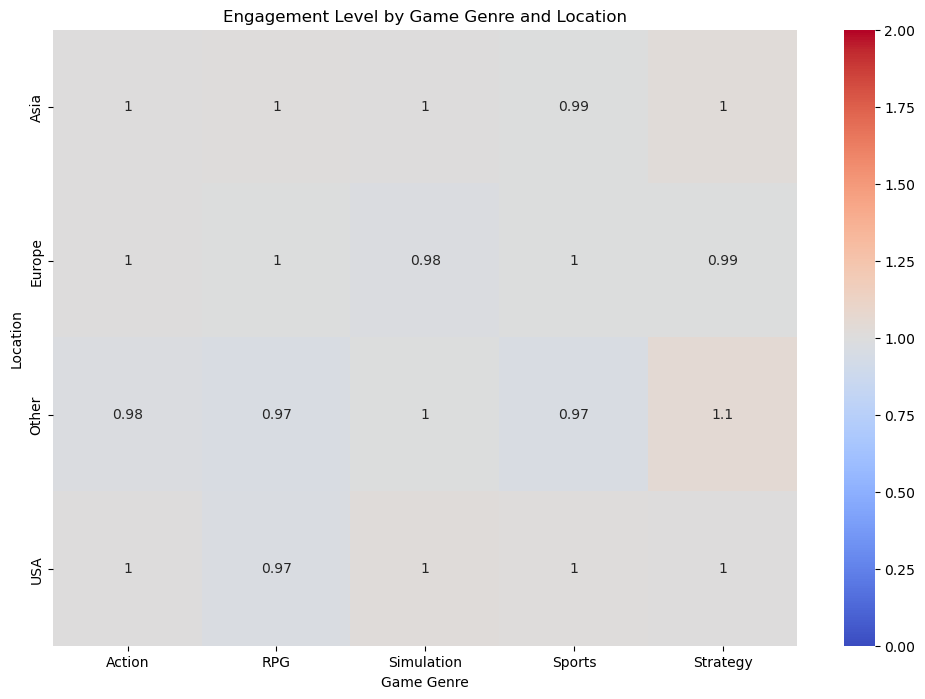

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by GameGenre and compute mean EngagementLevelEncoded
genre_engagement = data.groupby('GameGenre')['EngagementLevelEncoded'].mean()

# Plot engagement levels by GameGenre
plt.figure(figsize=(10, 6))
genre_engagement.plot(kind='bar', color='skyblue')
plt.title('Average Engagement Level by Game Genre')
plt.ylabel('Average Engagement Level')
plt.ylim(0, 2)
plt.xticks(rotation=45)
plt.show()

# Segment by Demographics (Example: Age groups)
data['AgeGroup'] = pd.cut(data['Age'], bins=[15, 25, 35, 45, 55], labels=['15-25', '25-35', '35-45', '45-55'])
age_genre_engagement = data.groupby(['AgeGroup', 'GameGenre'])['EngagementLevelEncoded'].mean().unstack()

# Plot engagement levels by GameGenre for different AgeGroups
plt.figure(figsize=(12, 8))
sns.heatmap(age_genre_engagement, annot=True, cmap='coolwarm', vmin=0, vmax=2)
plt.title('Engagement Level by Game Genre and Age Group')
plt.xlabel('Game Genre')
plt.ylabel('Age Group')
plt.show()

# Segment by Location
location_genre_engagement = data.groupby(['Location', 'GameGenre'])['EngagementLevelEncoded'].mean().unstack()

# Plot engagement levels by GameGenre for different Locations
plt.figure(figsize=(12, 8))
sns.heatmap(location_genre_engagement, annot=True, cmap='coolwarm', vmin=0, vmax=2)
plt.title('Engagement Level by Game Genre and Location')
plt.xlabel('Game Genre')
plt.ylabel('Location')
plt.show()


# **Result Interpretation:**
## Overall Genre Engagement:
### Most Engaging Genres:


* Strategy games: These tend to hold highest levels of engagement, pointing to the fact that players who love strategy games are most engaged.
* Simulation, Sports Games: These also imply very high levels of engagement; hence, these services of game categories seem at the top and in demand by the player base.
* RPG games: These have middle-of-the-road figures, indicating there is something consistent from the players' side.
##Age Group Trends:


### Younger Age Groups 15 - 25:


They prefer Sports and Simulation games.

They are highly engaged in these genres; which means that they consume more time playing these game genres.
 ### Middle Age Brackets 25-35,35-45:     
 They have relatively balanced engagement across multiple genres.

Strategy and Simulation games engage them significantly.
 ### Older Age Brackets 45-55:  
Strategy and RPG games seem to be their favorites.

Their engagement in such genres is moderate to high, which means they rather prefer challenging gameplay.
##Location Trends:


 ### USA:

* High engagement in Sports and Action games.
* Fast-paced, competitive gameplay seems to be what players from the USA are looking for.
### Europe:


* Show a preference for Simulation and Strategy.
* High engagement in such genres that denote an interest in thought-provoking and engaging gameplay.
### ASIA:


* Has pretty much a balanced engagement across RPG, Strategy, and Simulation games.
* Keeps diversified interest in different gameplay mechanics.




.....



# **Business Recommendations**

##Content Development:

* Top Genres: Develop more content and features for the top engaging genres, like Strategy and Simulation games to retain them.
* Demographic-driven Content Creation on genre-specific content based on Age and Location. For example, Sports games content would be more targeted towards the younger players while Simulation games are more targeted towards the players in Europe.

##Personalized Marketing:

* age-based campaigns: Segment campaigns to offer the most relevant genres across specific age groups. For example, promote role-playing games for older gamers and sporting games for the young.
* Locality-based promotions: Organize regional level campaigns – focus on campaigning the most popular game genres at each location. For example, sports games in the USA and simulation games in Europe.

##Enhance Engaging Mechanics:
Increase Session Frequency: Daily-challenge, rewards, and log-in bonuses will make players interested in having more sessions per week. Extend Session Duration: Offer in-game incentives through rewards for time spent in a session, using time-based rewards and extended content.




